Maternal Health Data And Health Risk Level

Question: To what extent can we use model data from “sensing enabled technology”: blood pressure, blood glucose level, body temperature and heart rate, to classify and predict Bangladeshi women’s maternal health risk level?

Fetal and maternal fatality is a pervasive problem especially in developing nations, and especially felt by disadvantaged classes. The Maternal Health Risk Dataset from UC Irvine Machine Learning Repository has tracked sensory data from pregnant women in rural villages in Bangladesh regarding health parameters like blood pressure and also their respective maternal health risk. 

Our data has the following variables (columns):

- Age 
- Systolic Blood Pressure (SystolicBP)
- Diastolic Blood Pressure (DiastolicBP)
- Blood Glucose Level (BS)
- Body Temperature (BodyTemp)
- Resting Heart Rate (HeartRate)
- Predicted Risk Intensity Level during pregnancy (RiskLevel)

We will use tidymodels to perform K-nearest neighbours to classify maternal health risk as either high, medium, or low, as predicted by all the remaining health variables. We will be doing cross-validation by splitting the same data into training and test sets to get a more robust estimate of accuracy. Understanding the association between health data and maternal risk can help medical professionals advise women on pregnancy and also help them understand what risk factors to look out for to prepare for them in advance.  

References:

10.24432/C5DP5D

Ahmed, M., Kashem, M.A., Rahman, M., & Khatun, S. (2020). Review and Analysis of Risk Factor of Maternal Health in Remote Area Using the Internet of Things (IoT).


In [73]:
library(repr)
library(tidyverse)
library(tidymodels)
install.packages("gridExtra")
library(gridExtra)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
mat_health_risk <- read_csv("https://raw.githubusercontent.com/aaronardenma/dsci-100-2023w1-group-41/main/Maternal_Health_Risk_Data_Set.csv")

mat_health_risk

Rows: 1014 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): RiskLevel
dbl (6): Age, SystolicBP, DiastolicBP, BS, BodyTemp, HeartRate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
29,90,70,8.00,100,80,high risk
30,140,85,7.00,98,70,high risk
35,120,60,6.10,98,76,low risk
23,140,80,7.01,98,70,high risk
23,130,70,7.01,98,78,mid risk
35,85,60,11.00,102,86,high risk
32,120,90,6.90,98,70,mid risk


In [32]:
set.seed(1) 

mat_health_risk_split <- initial_split(mat_health_risk, prop = 0.75, strata = RiskLevel)  
data_train <- training(mat_health_risk_split)   
data_test <- testing(mat_health_risk_split)

data_train

Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
25,130,80,15.00,98,86,high risk
35,140,90,13.00,98,70,high risk
23,140,80,7.01,98,70,high risk
25,140,100,7.01,98,80,high risk
40,140,100,18.00,98,90,high risk
25,140,100,6.80,98,80,high risk
23,140,90,6.80,98,70,high risk
34,85,60,11.00,102,86,high risk
50,140,90,15.00,98,90,high risk


In [33]:
unique_cases <- data_train |>
select(RiskLevel) |>
unique()

n_observations_1 <- data_train |>
filter(RiskLevel == "high risk") |>
nrow()

n_observations_2 <- data_train |>
filter(RiskLevel == "mid risk") |>
nrow()

n_observations_3 <- data_train |>
filter(RiskLevel == "low risk") |>
nrow()

classes <- c(slice(unique_cases, 1), slice(unique_cases, 2), slice(unique_cases, 3))

observations <- c(n_observations_1, n_observations_2, n_observations_3)
case_ob <- tibble(classes = classes, n_observations = observations)
case_ob

classes,n_observations
<named list>,<int>
high risk,204
low risk,252
mid risk,304


In [34]:
predictor_means <- data_train |>
select(-RiskLevel) |>
map_df(mean, na.rm=TRUE)

predictor_means

Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
29.36053,113.0947,76.44605,8.773211,98.65789,74.27368


In [35]:
na <- data_train |>
is.na() |>
unique()

na #no missing values in dataset

Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


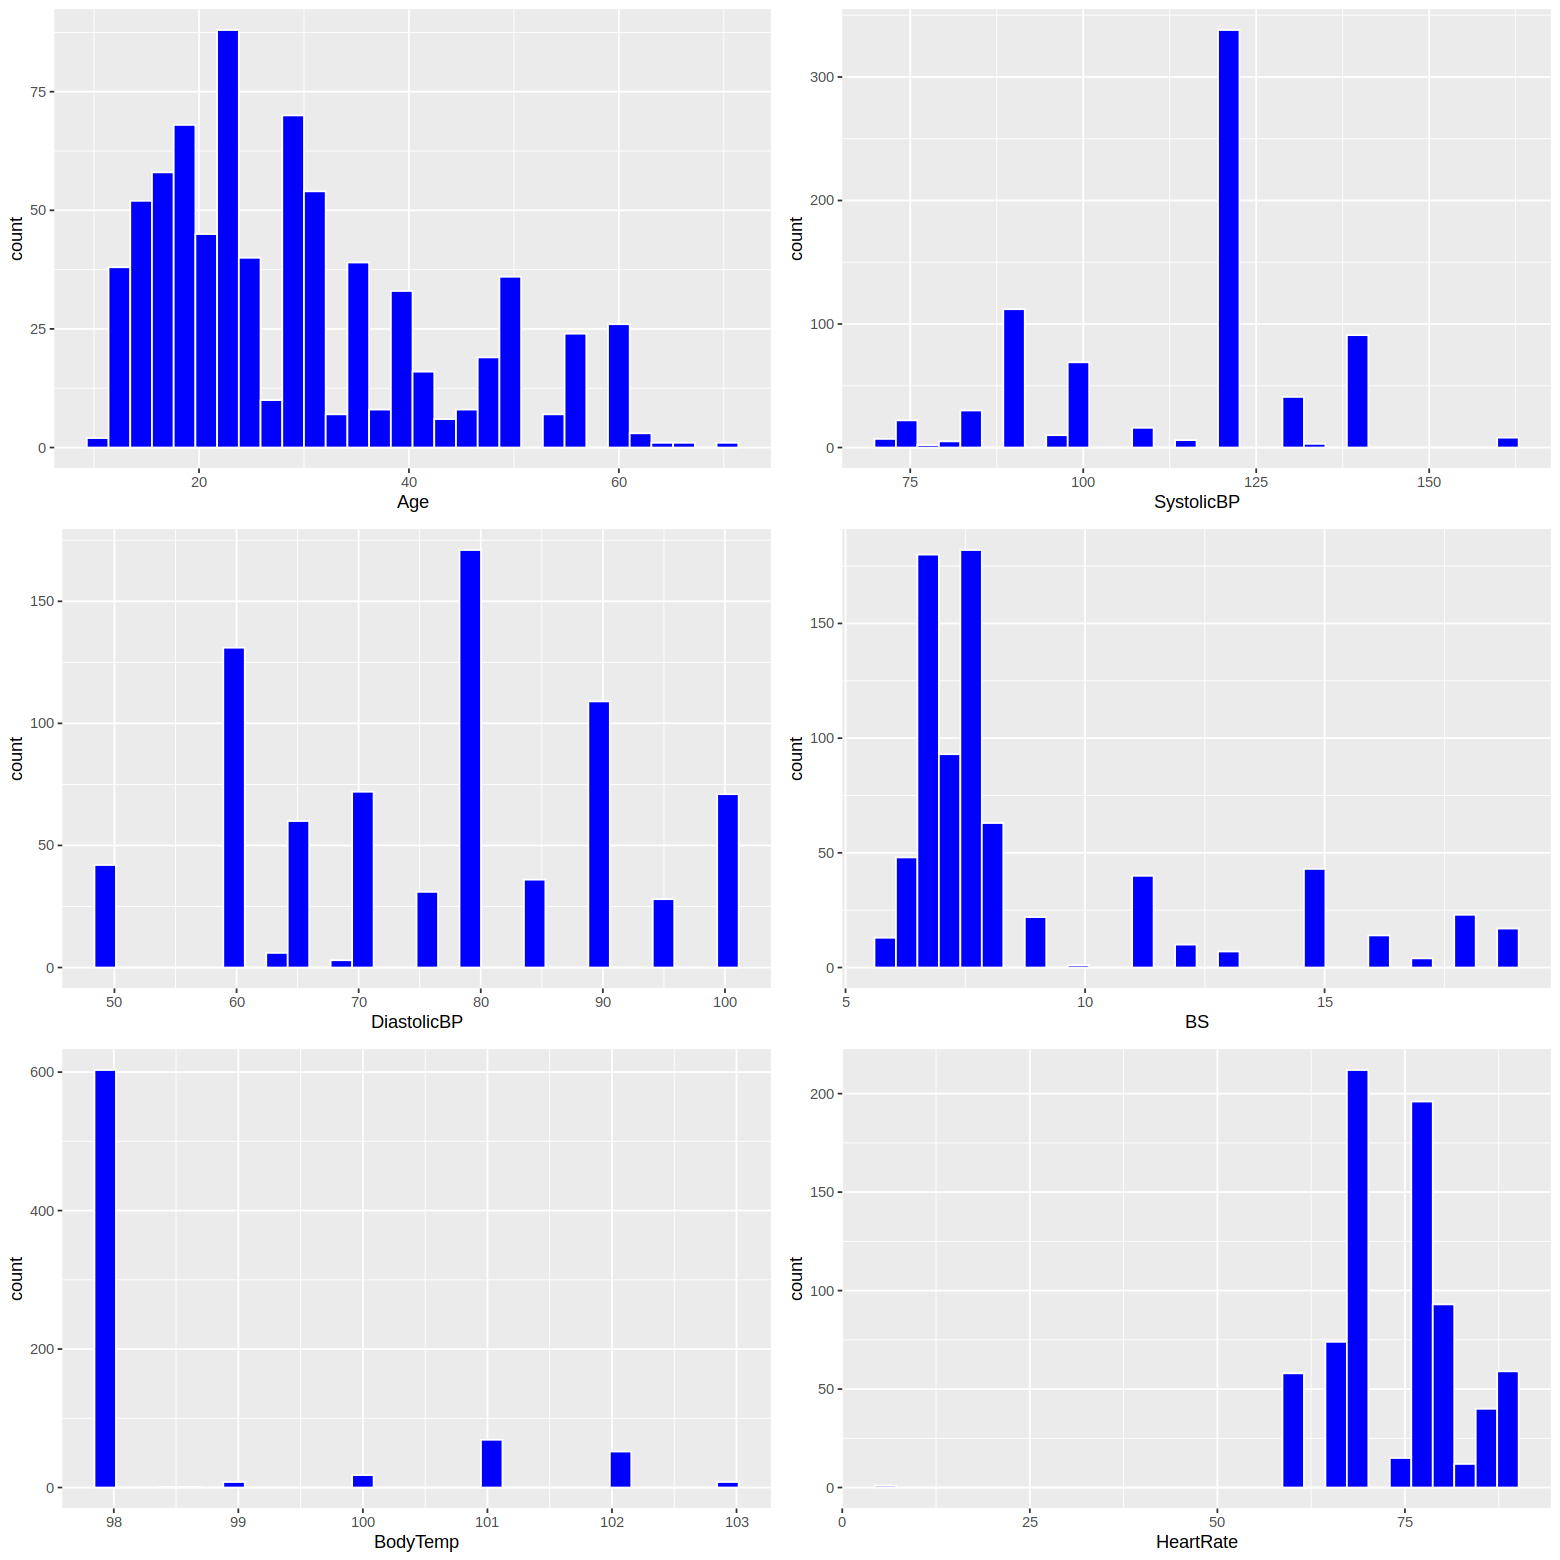

In [78]:
#visualising the distributions of each predictor
options(repr.plot.width = 13, repr.plot.height = 13)

age_hist <- ggplot(data_train, aes(x = Age)) +
  geom_histogram(color = "white", fill = "blue") 

systolicBP_hist <- ggplot(data_train, aes(x = SystolicBP)) +
  geom_histogram(color = "white", fill = "blue") 

diastolicBP_hist <- ggplot(data_train, aes(x = DiastolicBP)) +
  geom_histogram(color = "white", fill = "blue") 

BS_hist <- ggplot(data_train, aes(x = BS)) +
  geom_histogram(color = "white", fill = "blue") 

BodyTemp_hist <- ggplot(data_train, aes(x = BodyTemp)) +
  geom_histogram(color = "white", fill = "blue") 

HeartRate_hist <- ggplot(data_train, aes(x = HeartRate)) +
  geom_histogram(color = "white", fill = "blue") 

grid.arrange(age_hist,systolicBP_hist,diastolicBP_hist,BS_hist,BodyTemp_hist,HeartRate_hist, nrow = 3)

Methods:

